In [1]:
#define libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist
import networkx as nx
import time

In [2]:
# Define the sink coordinates
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 9, 0.6, 11]
coordinates = np.array(list(zip(x, y)))

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(coordinates)

C:\Users\muhta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [3]:
# Get the centroids, labels, and the cluster assignments of the clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
clusters = kmeans.predict(coordinates)

# Measure the centroid to sink distances
distances = cdist(coordinates, centroids)

# Assign the max distance as the height of the network
dmax = np.max(distances)

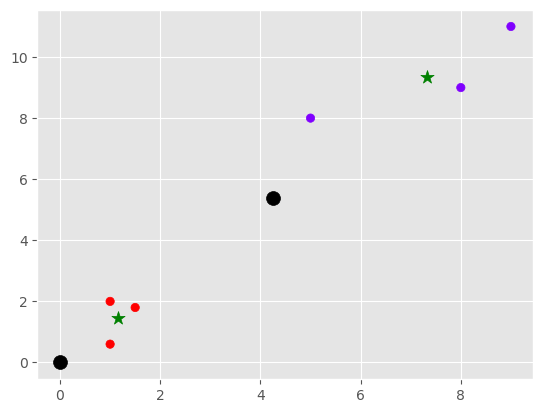

In [4]:
# Origin point
O = (0,0)

# Find X1, the centroid of C1 and C2
X1 = np.mean(centroids, axis=0)

# Plot the network using matplotlib
style.use('ggplot')
plt.scatter(x, y, c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='green')
plt.scatter(O[0], O[1], marker='o', s=100, c='black')
plt.scatter(X1[0], X1[1], marker='o', s=100, c='black')
plt.show()

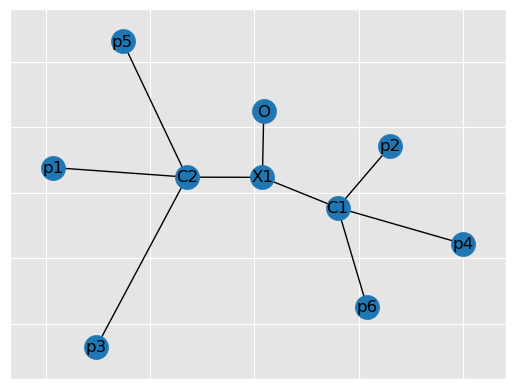

--- 0.0800180435180664 seconds ---


In [5]:
#JOG

start_time1 = time.time()

G=nx.Graph()

# Add edges and nodes to the graph
G.add_edge('O', 'X1', weight=np.linalg.norm(np.array(O) - np.array(X1)))
G.add_edge('X1', 'C1', weight=np.linalg.norm(np.array(X1) - np.array(centroids[0])))
G.add_edge('X1', 'C2', weight=np.linalg.norm(np.array(X1) - np.array(centroids[1])))
for i, label in enumerate(labels):
    G.add_edge('C' + str(label+1), 'p'+str(i+1), weight=distances[i][label])

# Draw the graph
nx.draw_networkx(G, with_labels=True)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time1))

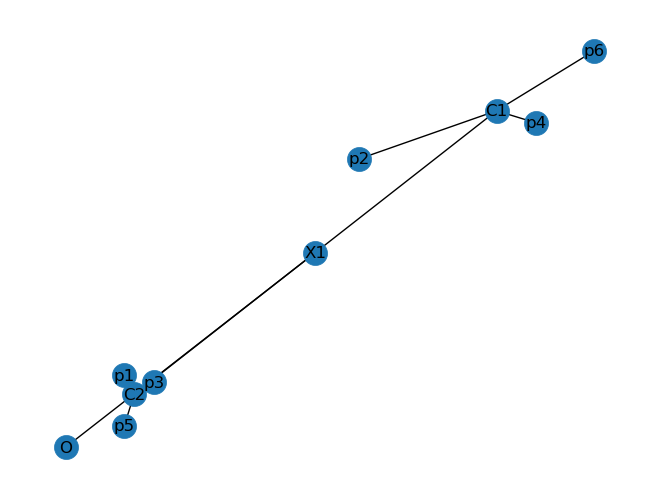

--- 0.11302495002746582 seconds ---


In [6]:
#Equal Height Tree

start_time2 = time.time()

# Add nodes for the origin, common point, and centroids
G.add_node("O", pos=(0, 0))
G.add_node("X1", pos=((centroids[0][0]+centroids[1][0])/2, (centroids[0][1]+centroids[1][1])/2))
G.add_node("C1", pos=tuple(centroids[0]))
G.add_node("C2", pos=tuple(centroids[1]))

# Add edges between the origin and common point
G.add_edge("O", "X1", weight=dmax)
G.add_edge("X1", "C1", weight=dmax)
G.add_edge("X1", "C2", weight=dmax)

# Add edges between the centroids and sinks
for i in range(6):
    G.add_node(f"p{i+1}", pos=tuple(coordinates[i]))
    G.add_edge(f"C{clusters[i]+1}", f"p{i+1}", weight=dmax)

# Plot the network using matplotlib
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time2))